# Data Analysis Project

Our analysis builds on data on NFL quarterbacks in the period 1996-2016.
We examine how the level of top QB's have changed in this period.
We do this by sorting the relevant data and illustrate our findings in different plots.

First we import the python packages and load the data.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#load data
nfl_qb = pd.read_csv("QBStats_all.csv")

We want to rename the QB column to player name:

In [99]:
#rename columns remember to rename more columns before handin 
nfl_qb.rename(columns={'qb':'player_name'}, inplace=True)

We construct a heatmap to examine correlation between QB stats to determine what makes an elite QB:

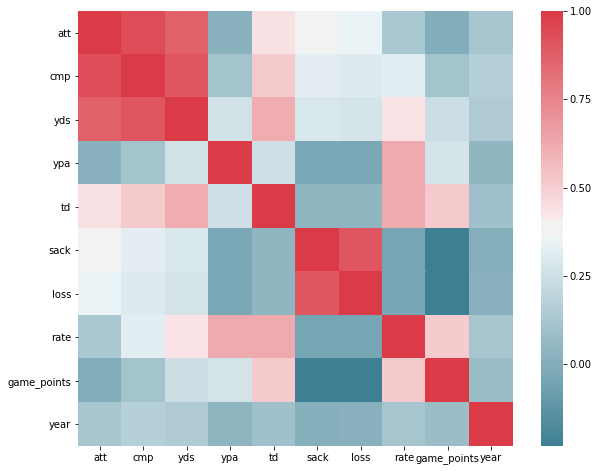

In [100]:
#Create heatmap of original dataset to see correltion
f, ax = plt.subplots(figsize=(10,8))
corr = nfl_qb.corr()
sns.heatmap(corr , mask=np.zeros_like(corr,dtype=np.bool), cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

From the plot we see a fairly high correlation between game_points and touchdowns and between game_points and passing rate.

First we sort the data based on the mean of passing rate for each QB in every year in the datasample.
We condition on an average of 80 as we are only interested in the elite QBs: 

In [101]:
#create new dateframe based on each year
sort_rate = nfl_qb.groupby(['year','player_name'])['rate'].mean().head(-10)
sort_rate1 = pd.Series.to_frame(sort_rate)
# create dataframe with passer rating >80
sort_rate2 = sort_rate1.loc[sort_rate1['rate'] >=80]
sort_rate2.head(-10)

rate
year player_name                                    
1996 Bernie KosarB. Kosar                 109.966667
     Brad JohnsonB. Johnson                89.050000
     Brett FavreB. Favre                   98.768750
     Carl PickensC. Pickens               116.700000
     Chris ChandlerC. Chandler             82.766667
     Craig EricksonC. Erickson             80.166667
     Curtis ConwayC. Conway               158.300000
     Dan MarinoD. Marino                   89.753846
     Danan HughesD. Hughes                118.800000
     Daryl HobbsD. Hobbs                   95.800000
     Drew BledsoeD. Bledsoe                85.706250
     Erik WilhelmE. Wilhelm                81.866667
     Gus FrerotteG. Frerotte               80.331250
     Harvey WilliamsH. Williams            98.950000
     Jamie MartinJ. Martin                 94.475000
     Jason GarrettJ. Garrett              118.800000
     Jay WalkerJ. Walker                  118.800000
     Jeff HostetlerJ. Hostetler            84.584615
     Jim HarbaughJ. Harbaugh               81.228571
     Jim McMahonJ. McMahon                 90.300000
     John ElwayJ. Elway                    87.206667
     John FrieszJ. Friesz                  80.262500
     Kerry CollinsK. Collins               81.123077
     Mark BrunellM. Brunell                86.825000
     Paul JustinP. Justin                  80.842857
     Rich GannonR. Gannon                 102.600000
     Scott ZolakS. Zolak                   87.500000
     Shane MatthewsS. Matthews            124.100000
     Steve BeuerleinS. Beuerlein           92.600000
     Steve McNairS. McNair                 89.077778
...                                              ...
2016 Andrew LuckA. Luck                    97.140000
     Andy DaltonA. Dalton                  93.693750
     Ben RoethlisbergerB. Roethlisberger   95.185714
     Brian HoyerB. Hoyer                   92.533333
     Cameron MeredithC. Meredith          118.800000
     Carson PalmerC. Palmer                88.940000
     Carson WentzC. Wentz                  80.443750
     Chase DanielC. Daniel                118.800000
     Cody KesslerC. Kessler                90.944444
     Colin KaepernickC. Kaepernick         87.418182
     Connor CookC. Cook                    83.400000
     Dak PrescottD. Prescott              105.631250
     DeMarco MurrayD. Murray               93.750000
     Derek CarrD. Carr                     96.093333
     Dez BryantD. Bryant                  147.900000
     Dontari PoeD. Poe                    118.800000
     Doug BaldwinD. Baldwin               158.300000
     Drew BreesD. Brees                   101.925000
     Eli ManningE. Manning                 88.293750
     Geno SmithG. Smith                    86.200000
     Jacoby BrissettJ. Brissett            86.433333
     Jameis WinstonJ. Winston              87.850000
     Joe FlaccoJ. Flacco                   83.850000
     Kirk CousinsK. Cousins                98.887500
     Marcus MariotaM. Mariota              96.080000
     Marqise LeeM. Lee                    158.300000
     Matt CasselM. Cassel                  82.600000
     Matt MooreM. Moore                    99.500000
     Matt RyanM. Ryan                     116.831250
     Matthew StaffordM. Stafford           94.606250

[882 rows x 1 columns]

We see that too many players that do not play the role of QB regularly give a distorted outlook and so we condition on games played with a min of 8.

We do this by removing all players that have played less than 8 games which corresponds to half a regular season:

In [102]:
nr_game = nfl_qb.groupby(['year','player_name'])['home_away'].count().head(-10)
nr_game1 = pd.Series.to_frame(nr_game)
nr_game2 = nr_game1.loc[nr_game1['home_away']>=8]
nr_game2.head()

home_away
year player_name                         
1996 Bobby HebertB. Hebert             14
     Boomer EsiasonB. Esiason          10
     Brad JohnsonB. Johnson            12
     Brett FavreB. Favre               16
     Chris ChandlerC. Chandler         12

We now merge games played with rating so we get the true high performers:

In [103]:
nfl_qb1 = pd.merge(sort_rate2,nr_game2,how='outer',on=['player_name','year'])
nfl_qb1.dropna(inplace=True)
print(nfl_qb1)

                                                rate  home_away
player_name                         year                       
Brad JohnsonB. Johnson              1996   89.050000       12.0
Brett FavreB. Favre                 1996   98.768750       16.0
Chris ChandlerC. Chandler           1996   82.766667       12.0
Dan MarinoD. Marino                 1996   89.753846       13.0
Drew BledsoeD. Bledsoe              1996   85.706250       16.0
Gus FrerotteG. Frerotte             1996   80.331250       16.0
Jeff HostetlerJ. Hostetler          1996   84.584615       13.0
Jim HarbaughJ. Harbaugh             1996   81.228571       14.0
John ElwayJ. Elway                  1996   87.206667       15.0
John FrieszJ. Friesz                1996   80.262500        8.0
Kerry CollinsK. Collins             1996   81.123077       13.0
Mark BrunellM. Brunell              1996   86.825000       16.0
Steve McNairS. McNair               1996   89.077778        9.0
Steve YoungS. Young                 1996

Now we have collected the data on what we determine to make up an elite QB and we take the mean of each year to see if there is a development in the quality of QBs:

In [104]:
#find total avg rating each year
avg_total_rating = nfl_qb1.groupby(['year'])['rate'].mean().head(21)
print(avg_total_rating)

year
1996    86.588111
1997    88.461551
1998    89.628519
1999    86.109121
2000    91.967121
2001    86.586234
2002    87.514631
2003    89.040242
2004    92.904067
2005    90.716486
2006    90.175065
2007    91.923607
2008    89.972625
2009    94.314831
2010    92.226824
2011    91.126299
2012    92.542390
2013    92.168164
2014    92.415434
2015    93.469202
2016    94.871739
Name: rate, dtype: float64


We see that mean of passing rate have increased from 1996 to 2016 and so we plot the data to see the overall trend:

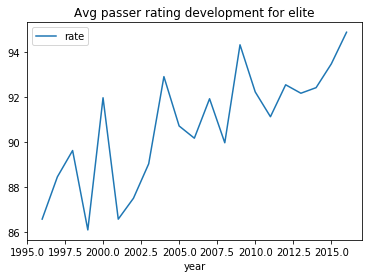

In [105]:
#plot
#a. make it into a data frame
avg_total_rating1 = pd.Series.to_frame(avg_total_rating)
#make plot
avg_total_rating1.plot(kind='line',title='Avg passer rating development for elite')

We see that there is a clear trend indicating that indeed the generel level of elite QB's have increased in the sample period.

We now look at the very best QB in every season to see if there is similar trend:

In [106]:
mean_rate = nfl_qb1.groupby(by=['year', 'player_name']).agg({'rate':np.mean})

In [107]:
mean_rate1=mean_rate.sort_values(by=['year', 'rate'], ascending=False).groupby(level=0).head(1)

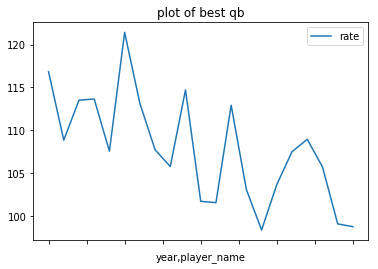

In [108]:
mean_rate1.plot(kind='line',title='plot of best qb')

Here the x-axis is inverted so 2016 is the first year. We se a similar development of the very best QB's getting better over time.

Now lets consider one of the games all time great and his development over his career. First we need to get the exact names of each player in the dataset

In [109]:
#all player names
nfl_qb['player_name'].unique()

array(['Boomer EsiasonB.\xa0Esiason', 'Jim HarbaughJ.\xa0Harbaugh',
       'Paul JustinP.\xa0Justin', 'Jeff GeorgeJ.\xa0George',
       'Kerry CollinsK.\xa0Collins', 'Jeff BlakeJ.\xa0Blake',
       'Steve WalshS.\xa0Walsh', 'Scott MitchellS.\xa0Mitchell',
       'Mark RoyalsM.\xa0Royals', 'Brad JohnsonB.\xa0Johnson',
       'Warren MoonW.\xa0Moon', 'Steve BonoS.\xa0Bono',
       'Chris ChandlerC.\xa0Chandler', 'Billy Joe HobertB.\xa0Hobert',
       'Vinny TestaverdeV.\xa0Testaverde', 'Rodney PeeteR.\xa0Peete',
       'Gus FrerotteG.\xa0Frerotte', 'Jim MillerJ.\xa0Miller',
       'Mike TomczakM.\xa0Tomczak', 'Kordell StewartK.\xa0Stewart',
       'Mark BrunellM.\xa0Brunell', 'Brett FavreB.\xa0Favre',
       'Jim McMahonJ.\xa0McMahon', 'Trent DilferT.\xa0Dilfer',
       'Drew BledsoeD.\xa0Bledsoe', 'Dan MarinoD.\xa0Marino',
       'Jim EverettJ.\xa0Everett', 'Steve YoungS.\xa0Young',
       'Elvis GrbacE.\xa0Grbac', "Neil O'DonnellN.\xa0O'Donnell",
       'Frank ReichF.\xa0Reich', 'John 

<function matplotlib.pyplot.show(*args, **kw)>

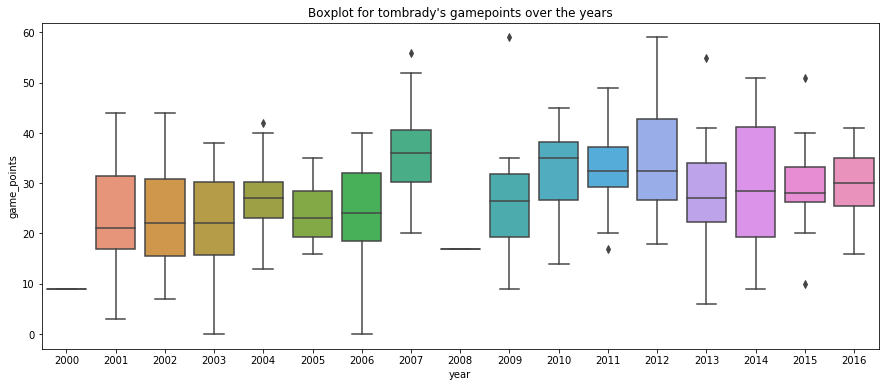

In [110]:
#consider the points scored for tom brady
tom_brady = nfl_qb[nfl_qb['player_name']=='Tom BradyT.\xa0Brady']
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x=tom_brady['year'],y=tom_brady['game_points'],width=.8)
plt.title("Boxplot for tombrady's gamepoints over the years")
plt.show

The same prcedure can be done to consider how he does across home and away games

<function matplotlib.pyplot.show(*args, **kw)>

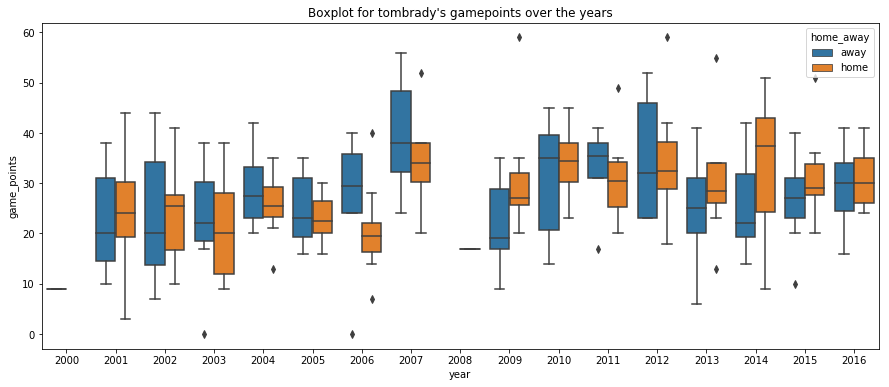

In [111]:
tom_brady = nfl_qb[nfl_qb['player_name']=='Tom BradyT.\xa0Brady']
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x=tom_brady['year'],y=tom_brady['game_points'],width=.8,hue=tom_brady['home_away'])
plt.title("Boxplot for tombrady's gamepoints over the years")
plt.show

This can be done with every player in our dataset, using there uniqu data names.